# **Huawei IoT Competition**

### **Melanoma Classification Using Deep Learning**


---


*Background*: Melanoma is responsible for 75% of skin cancer deaths, despite being the least common skin cancer. The American Cancer Society estimates over 100,000 new melanoma cases will be diagnosed in 2020. It's also expected that almost 7,000 people will die from the disease. As with other cancers, early and accurate detection can make treatment more effective.



> The Dataset used in this project available at https://www.isic-archive.com/#!/topWithHeader/wideContentTop/main





## **A Deep Learning Approach for Melanoma Prediction**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!unzip -q '/content/drive/My Drive/skin_project/skin_dataset.zip'

In [ ]:
GDRIVEPATH='skin_dataset/'

In [ ]:
import os, shutil

base_dir = GDRIVEPATH

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_benign_dir = os.path.join(train_dir, 'benign')
train_malignant_dir = os.path.join(train_dir, 'malignant')

validation_benign_dir = os.path.join(validation_dir, 'benign')
validation_malignant_dir = os.path.join(validation_dir, 'malignant')

test_benign_dir = os.path.join(test_dir, 'benign')
test_malignant_dir = os.path.join(test_dir, 'malignant')

In [ ]:
import shutil
import os

for f in os.listdir(train_benign_dir)[:250]:
  shutil.move(train_benign_dir+"/"+f, validation_benign_dir+"/")

for f in os.listdir(train_malignant_dir)[:250]:
  shutil.move(train_malignant_dir+"/"+f, validation_malignant_dir+"/")

for f in os.listdir(train_benign_dir)[:250]:
  shutil.move(train_benign_dir+"/"+f, test_benign_dir+"/")

for f in os.listdir(train_malignant_dir)[:250]:
  shutil.move(train_malignant_dir+"/"+f, test_malignant_dir+"/")

In [ ]:
print('total training benign images:', len(os.listdir(train_benign_dir)))
print('total training malignant images:', len(os.listdir(train_malignant_dir)))

total training benign images: 1500
total training malignant images: 1500


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
     print('data batch shape:', data_batch.shape)
     print('labels batch shape:', labels_batch.shape)
     break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
100/100 [==============================] - 482s 5s/step - loss: 0.6596 - acc: 0.6030 - val_loss: 0.6321 - val_acc: 0.6200
Epoch 2/10
100/100 [==============================] - 420s 4s/step - loss: 0.5728 - acc: 0.6915 - val_loss: 0.5546 - val_acc: 0.7240
Epoch 3/10
100/100 [==============================] - 416s 4s/step - loss: 0.5151 - acc: 0.7450 - val_loss: 0.4870 - val_acc: 0.7610
Epoch 4/10
100/100 [==============================] - 404s 4s/step - loss: 0.4826 - acc: 0.7680 - val_loss: 0.4759 - val_acc: 0.7610
Epoch 5/10
100/100 [==============================] - 392s 4s/step - loss: 0.4645 - acc: 0.7775 - val_loss: 0.4526 - val_acc: 0.8010
Epoch 6/10
100/100 [==============================] - 382s 4s/step - loss: 0.4314 - acc: 0.7915 - val_loss: 0.4878 - val_acc: 0.7450
Epoch 7/10
100/100 [==============================] - 389s 4s/step - loss: 0.4121 - acc: 0.8080 - val_loss: 0.4056 - val_acc: 

In [ ]:
model.save('SkinModel.h5')

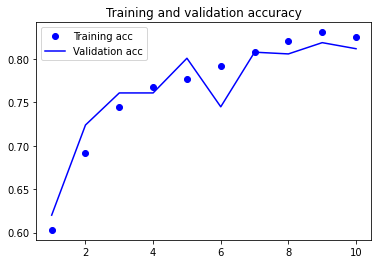

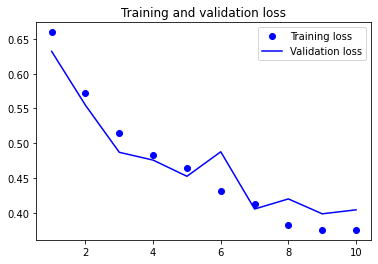

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
Testing_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
prop = model.predict(Testing_generator)
print(prop)

In [ ]:
score = model.evaluate(Testing_generator)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

50/50 [==============================] - 112s 2s/step - loss: 0.3893 - acc: 0.8110
Test accuarcy: 81.10%
